# Onverzadigde zone, proefschrift Pieter de Laat (1980)

In [120]:
import os
import numpy as np
import matplotlib.pyplot as plt
from etc import newfig
import pandas as pd
import scipy
from scipy.interpolate import make_interp_spline
from etc import attr

In [15]:
class Dirs:
    def __init__(self):
        self.home = '/Users/Theo/Entiteiten/Hygea/2022-AGT/jupyter/'
        self.data = os.path.join(self.home, 'data')
    
dirs = Dirs()
print(dirs.K_dig)
os.path.isdir(dirs.data)


/Users/Theo/Entiteiten/Hygea/2022-AGT/jupyter/data


True

In [16]:
os.getcwd()

'/Users/Theo/Entiteiten/Hygea/2022-AGT/jupyter/data'

## Constante verticale flux in de onverzadigde zone

$$ \frac {d1}{dz}=0 \,\,\,\,\rightarrow\,\,\,\,q=\overline{q}=constant=q_s=q_w$$

waar $q_s$ de flux aan de onderzijde van de wortelzone en $q_w$ de flux door het freatisch vlak.

De flux is gegeven door Darcy's wet

$$ \overline{q}=-K\frac{d\phi}{dz} $$

met
$$\phi = \frac{p}{\rho g} + z$$

Wat leidt tot
$$ \overline{q} = -K(p) \left(\frac{1}{\rho g}\frac{dp}{dz} + 1\right)$$

Scheiding van variabelen, z links en p rechts, geeft
$$dz = \frac{1}{\rho g} \left(\frac{K(p)}{\overline{q} + K(p)}\right) dp$$

zodat

$$z = \frac{1}{\rho g} \intop_0^p \frac{K(p)}{\overline{q} + K(p)} dp$$

Hiermee kan de $z$ worden berekend als functie van de druk $p$ bij gegeven uniforme verticale flux $\overline q$ en gegevens relatie tussen de doorlatendheid in de onverzadigde $K(p)$ zone en de druk $p$. Hierbij wordt het referentieniveau voor de druk $p=0$ en de hoogte $z=0$ gemakshalve gekozen op het freatisch vlak.

Eem juiste definitie van capillaire opstijging de hoogte boven het freatisch vlak waarop een constante opwaartse flux kan worden gehandhaafd voor een gegeven matrix spanning op deze hoogte. De maximale capillaire opstijging is het de hoogte die correspondeert met het verwelkingspunt of een zuigspanning van -16000 mbar oftewel pF=-log(p)=4.2 (1 mbar kokmt overeen met 1 cm waterkolom).
Met het verband tussen de zuigspanning en het vochtgehalte, $\theta(p)$, de bekende pF-curve (soil moisture characteristic curve of de pF curve), kan een drukprofiel gemakkelijk worden omgerekend naar een vochtprofiel $z(\theta, \overline{q})$.

De dimensies van de voorgaande formule zijn als volgt: Het argument onder de integraal is dimensieloos, zodat de hele integraal de dimensie van $p$ heeft, in dit geval mmbar of hPa (1 cm of water, a milimbar, is 10 kg of water per m2 is $100\, N/m^2 = 1\, hPa$). Dit wordt vermenigvuldigd met $1 / (\rho g) [m^3 / kg]$ m.

$$[z] =\frac{p}{\rho g} =\left[10^{-4}\frac{m^3}{kg}\frac{kg}{N}\right] \left[ \frac{100\, N}{m^2}\hat{p}\right] = 100^{-2} \hat{p}[ m] = \hat{p}[cm]$$

Waarin $p$ de druk in mbar en $\hat{p}$ de getalswaaarde voor de druk zonder dimensie. We krijgen $z$ in cm door de factor $1/(rho g)$ weg te laten en te rekenen met druk in mbar.



In [90]:
K_dig = pd.read_csv(os.path.join(dirs.data, 'DeLaatFig5a.csv'))
pF_dig = pd.read_csv(os.path.join(dirs.data, 'DeLaatFig5b.csv'))
K_dig
pF_dig

,theta,p
0,0.022000,16000.000000
1,0.022240,14312.411566
2,0.023031,12473.856164
3,0.023381,10890.684324
4,0.024116,9422.766810
...,...,...
107,0.341273,1.652588
108,0.342504,1.470869
109,0.343735,1.309133
110,0.344966,1.165180


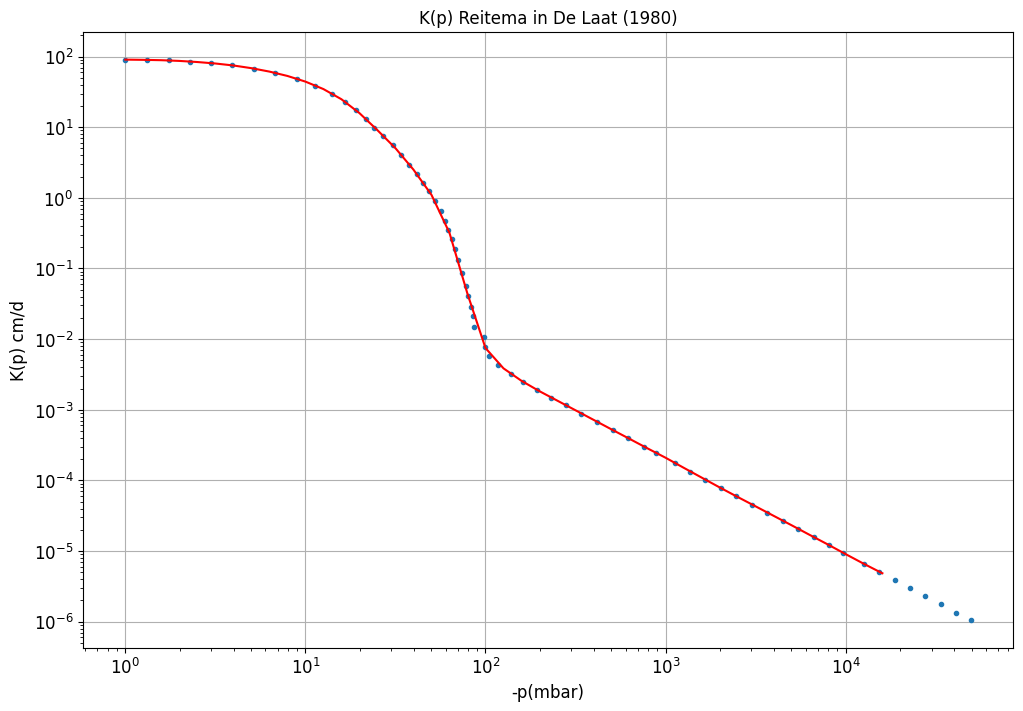

In [121]:
ax = newfig("K(p) Reitema in De Laat (1980)", "-p(mbar)", "K(p) cm/d", xscale='log', yscale='log') 
ax.plot(K_dig['p'], K_dig['k'], '.')

p = np.logspace(0, 5, 51)
p = np.hstack((p[p<=16000.], 16000.)) # Wilting point
K_of_p = make_interp_spline(K_dig['p'], K_dig['k'], k=1)
ax.plot(p,K_of_p(p), 'r')

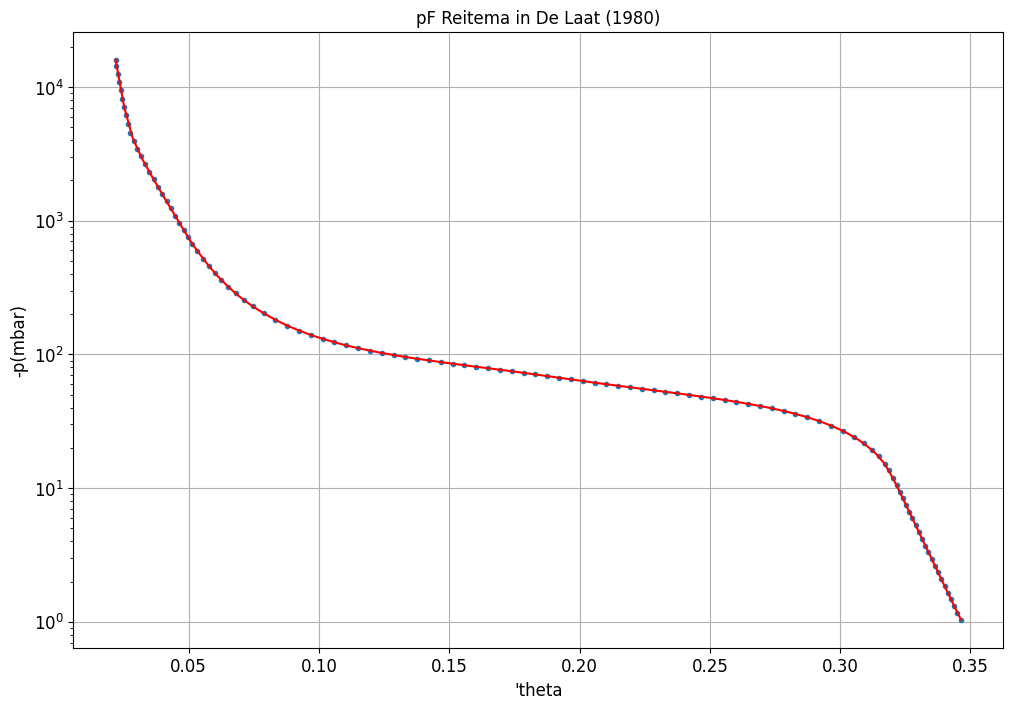

In [122]:
# De kaatm Fig 5B pF curve of fine sand
ax = newfig("pF Reitema in De Laat (1980)", "'theta","-p(mbar)", xscale='linear', yscale='log')

ax.plot(pF_dig['theta'], pF_dig['p'], '.')

theta = np.linspace(pF_dig['theta'].iloc[0], pF_dig['theta'].iloc[-1], 100)
p_of_theta = make_interp_spline(pF_dig['theta'], pF_dig['p'], k=1)
len(pF_dig['theta']), len(pF_dig['p'])
ax.plot(theta, p_of_theta(theta), 'r')

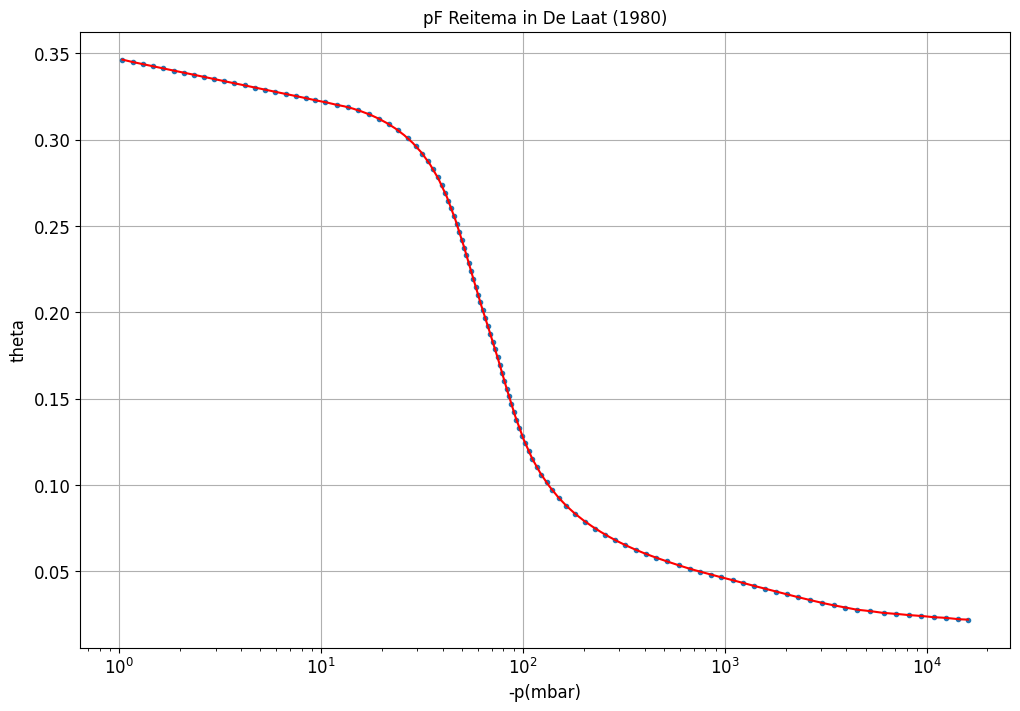

In [125]:
# De Laat theta(p) of fine sand
ax = newfig("pF Reitema in De Laat (1980)", "-p(mbar)", "theta", xscale='log', yscale='linear')

ax.plot(pF_dig['p'], pF_dig['theta'], '.')

p = np.logspace(np.log10(pF_dig['p'].iloc[0]), np.log10(pF_dig['p'].iloc[-1]), 100)

theta_of_p = make_interp_spline(pF_dig['p'].values[::-1], pF_dig['theta'].values[::-1], k=1)

ax.plot(p, theta_of_p(p), 'r')

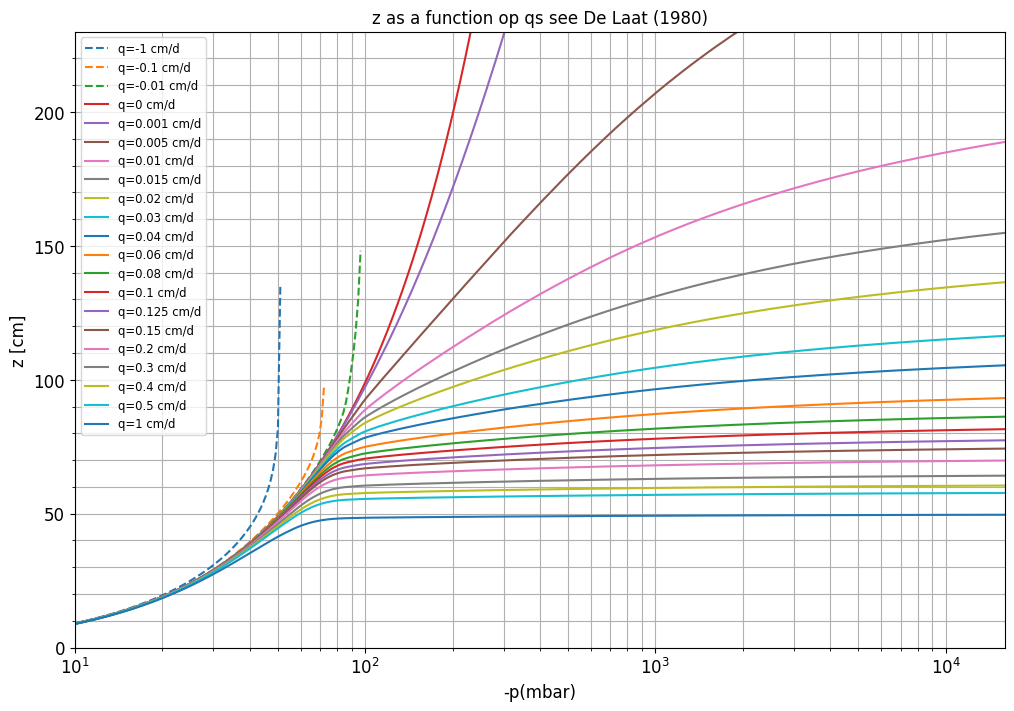

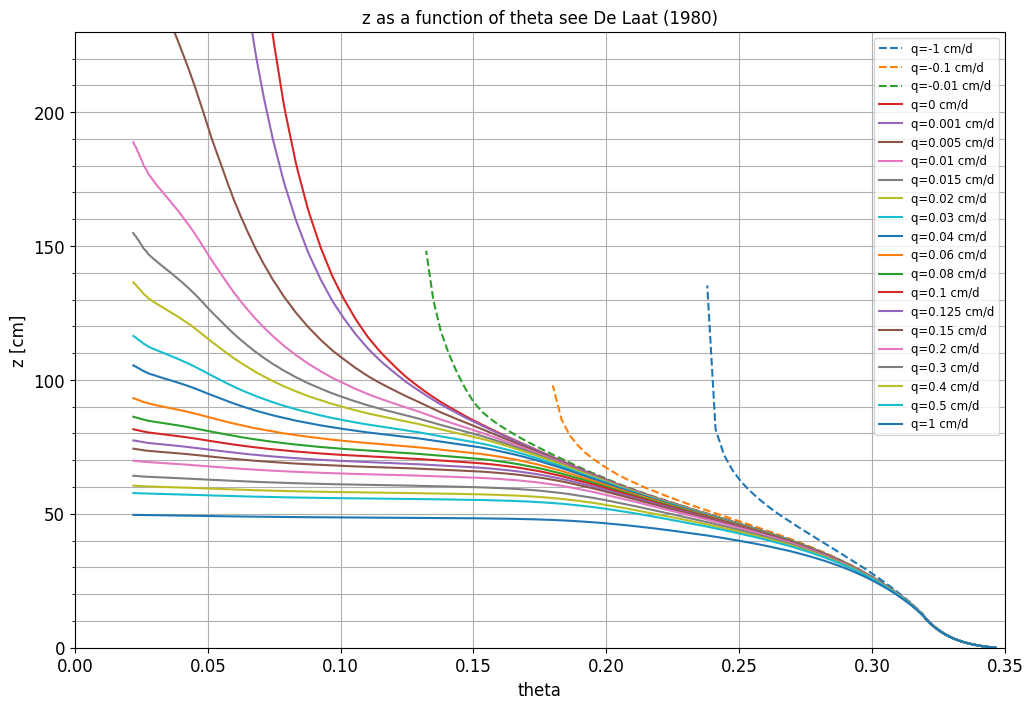

In [135]:
ax1 = newfig("z as a function op qs see De Laat (1980)", "-p(mbar)", "z [cm]", xscale='log', yscale='linear', xlim=(10, 1.6e4), ylim=(0, 230))
ax2 = newfig("z as a function of theta see De Laat (1980)", "theta", "z [cm]", xscale='linear', yscale='linear', xlim=(0, 0.35), ylim=(0, 230)) 
ax1.set_yticks(np.arange(0, 230, 10.), minor=True)
ax2.set_yticks(np.arange(0, 230, 10.), minor=True)
ax1.grid(visible=True, which='minor', axis='both')
ax2.grid(visible=True, which='minor', axis='both')
rho, g = 1000, 10. # kg/cm3, N/kg --> N/cm3
p = np.logspace(np.log10(np.min(pF_dig['p'])), np.log10(np.max(pF_dig['p'])), 501)
dp = np.diff(p)
z = np.zeros_like(p)
z[1:] = np.nan
qs = [-1.0, -0.1, -0.01, 0., 0.001, 0.005, 0.01, 0.015, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1, 0.125, 0.15, 0.2, 0.3, 0.4, 0.5, 1.] # cm/d
for q in qs:
    ls = '--' if q < 0 else '-'
    for i in range(len(p)):
        if i == 0:
            continue
        else:
            dz = K_of_p(p[i]) / (q + K_of_p(p[i])) * dp[i-1]
            if dz < 0:
                break
            z[i] = z[i - 1] + dz  
    
    ax1.plot(p, z, ls, label=f"q={q:.3g} cm/d")
    ax2.plot(theta_of_p(p), z, ls, label=f"q={q:.3g} cm/d")
    ax1.legend(loc="upper left", fontsize='small')
    ax2.legend(loc="upper right", fontsize='small')